## Topic Modeling

# Arxiv Artciles: Computation and Language Category

In [1]:
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

# Extract metdata
abstracts = list(dataset["Abstracts"])
titles = list(dataset["Titles"])

d:\2026-courses\LLMs-Handson\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Acommon Pipeline for Text Clustering

In [2]:
from sentence_transformers import SentenceTransformer

# Create embedding for each abstract
embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

W0131 08:08:23.829000 17012 Lib\site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.
d:\2026-courses\LLMs-Handson\venv\Lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches: 100%|██████████| 1405/1405 [02:29<00:00,  9.39it/s]


In [4]:
embeddings.shape

(44949, 384)

## Reduce the Dimensionality of Embeddings

In [5]:
from umap import UMAP

umap_model= UMAP(
    n_components=5,
    min_dist=0.0,
    metric="cosine",
    random_state=42,
)
reduced_embeddings= umap_model.fit_transform(embeddings)


d:\2026-courses\LLMs-Handson\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [6]:
reduced_embeddings.shape

(44949, 5)

## Cluster the reduce embeddings


In [7]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(
    min_cluster_size=50,
    metric="euclidean",
    cluster_selection_method="eom",
).fit(reduced_embeddings)

In [8]:
clusters = hdbscan_model.labels_
print(f"Number of clusters: {len(set(clusters))}")

Number of clusters: 159


## Inspecting the Cluster

In [10]:
import numpy as np
cluster = 0
for index in np.where(clusters == cluster)[0][:3]:
    print(abstracts[index][:300]+"... \n")

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo... 

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang... 

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf... 



### Let us reduce the embeddings to 2-dimensions so that we can plot them and get a rough understanding of the generated clusters

## static Plot

In [13]:
import pandas as pd
# Reduce the dimensionality of the embeddings to 2-dimensions
from umap import UMAP

umap_model= UMAP(
    n_components=2,
    min_dist=0.0,
    metric="cosine",
    random_state=42,
)
reduced_embeddings= umap_model.fit_transform(embeddings)

d:\2026-courses\LLMs-Handson\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [16]:
# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
#df["cluster"] = [str(s) for s in clusters]
df["cluster"] = clusters

df.head()

,x,y,title,cluster
0,4.148614,12.748173,Introduction to Arabic Speech Recognition Usin...,149
1,4.155589,12.740182,Arabic Speech Recognition System using CMU-Sph...,149
2,3.316732,11.936174,On the Development of Text Input Method - Less...,-1
3,1.431549,10.130220,Network statistics on early English Syntax: St...,-1
4,3.845703,7.919153,Segmentation and Context of Literary and Music...,70


In [19]:
# Select outlier and non-outliers
clusters_df = df[df["cluster"] != -1]
outliers_df = df[df["cluster"] == -1]

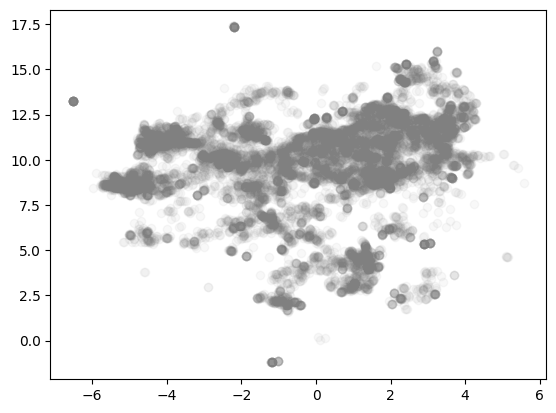

In [21]:
import matplotlib.pyplot as plt
# Plot outliers and non-outliers separately

plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, c="grey")


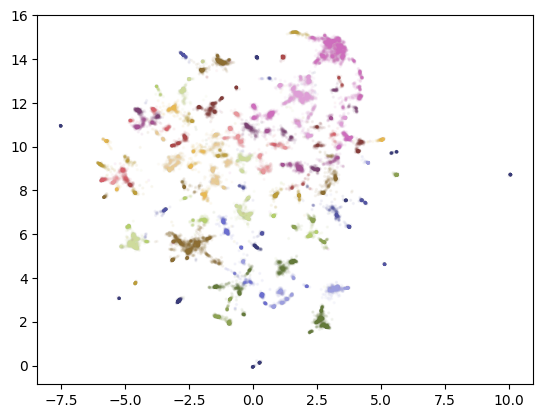

In [24]:
plt.scatter(clusters_df.x, clusters_df.y, alpha=0.05, c=clusters_df.cluster, s=2, cmap="tab20b")

(np.float64(-8.423831701278687),
 np.float64(10.948607206344604),
 np.float64(-2.1428836584091187),
 np.float64(18.30795180797577))

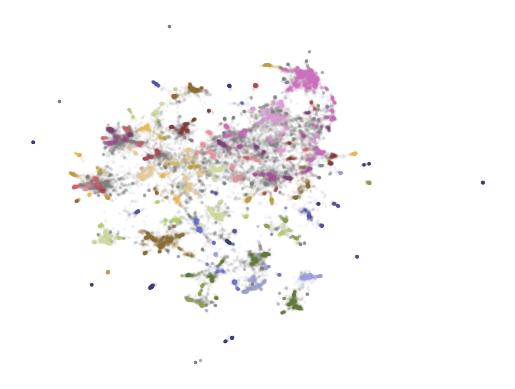

In [26]:

plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c="grey")
plt.scatter(clusters_df.x, clusters_df.y, alpha=0.05, c=clusters_df.cluster, s=2, cmap="tab20b")
plt.axis('off')